In [1]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

nsample = 20
x = np.linspace(0,10,nsample)
x

array([ 0.        ,  0.52631579,  1.05263158,  1.57894737,  2.10526316,
        2.63157895,  3.15789474,  3.68421053,  4.21052632,  4.73684211,
        5.26315789,  5.78947368,  6.31578947,  6.84210526,  7.36842105,
        7.89473684,  8.42105263,  8.94736842,  9.47368421, 10.        ])

# 一元线性回归

In [2]:
X = sm.add_constant(x)
X

array([[ 1.        ,  0.        ],
       [ 1.        ,  0.52631579],
       [ 1.        ,  1.05263158],
       [ 1.        ,  1.57894737],
       [ 1.        ,  2.10526316],
       [ 1.        ,  2.63157895],
       [ 1.        ,  3.15789474],
       [ 1.        ,  3.68421053],
       [ 1.        ,  4.21052632],
       [ 1.        ,  4.73684211],
       [ 1.        ,  5.26315789],
       [ 1.        ,  5.78947368],
       [ 1.        ,  6.31578947],
       [ 1.        ,  6.84210526],
       [ 1.        ,  7.36842105],
       [ 1.        ,  7.89473684],
       [ 1.        ,  8.42105263],
       [ 1.        ,  8.94736842],
       [ 1.        ,  9.47368421],
       [ 1.        , 10.        ]])

In [14]:
beta = np.array([2,5])
beta #参数

array([2, 5])

In [13]:
e = np.random.normal(size=nsample)
e #残差

array([-1.01503917, -3.77450185, -0.27448574, -0.40917605,  0.22854318,
       -1.04525768, -0.48706786,  0.19618733,  1.48347848, -1.17396293,
       -2.99626079,  1.96876015,  0.37243154, -0.14809158,  0.25499674,
       -0.08669742, -1.8067912 , -0.25590783,  2.08700542, -1.40336029])

In [6]:
y = np.dot(X,beta) + e
y

array([ 2.01600249,  5.01921712,  7.59946987,  9.86333304, 13.21912749,
       16.10996949, 17.56966806, 21.32947135, 22.99310291, 26.48220655,
       29.37616151, 30.52842706, 34.25530675, 36.00887287, 39.73001408,
       43.32455693, 43.86488831, 45.67074046, 49.20680175, 53.79908809])

In [7]:
model = sm.OLS(y,X)

In [8]:
res = model.fit()

In [12]:
res.params #回归系数

array([2.31903198, 5.01585787])

In [10]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                     8010.
Date:                Mon, 09 May 2022   Prob (F-statistic):           2.66e-25
Time:                        01:47:33   Log-Likelihood:                -21.854
No. Observations:                  20   AIC:                             47.71
Df Residuals:                      18   BIC:                             49.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.3190      0.328      7.075      0.000       1.630       3.008
x1             5.0159      0.056     89.498      0.000       4.898       5.134
==============================================================================
Omnibus:                        0.037   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.982   Jarque-Bera (JB):                0.157
Skew:                           0.081   Prob(JB):                        0.924
Kurtosis:                       2.597   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
res.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                 Results: Ordinary least squares
=================================================================
Model:              OLS              Adj. R-squared:     0.998   
Dependent Variable: y                AIC:                47.7073 
Date:               2022-05-09 01:47 BIC:                49.6988 
No. Observations:   20               Log-Likelihood:     -21.854 
Df Model:           1                F-statistic:        8010.   
Df Residuals:       18               Prob (F-statistic): 2.66e-25
R-squared:          0.998            Scale:              0.57860 
--------------------------------------------------------------------
         Coef.     Std.Err.       t       P>|t|     [0.025    0.975]
--------------------------------------------------------------------
const    2.3190      0.3278     7.0745    0.0000    1.6303    3.0077
x1       5.0159      0.0560    89.4983    0.0000    4.8981    5.1336
-----------------------------------------------------------------
Omnibus:              0.037        Durbin-Watson:           2.037
Prob(Omnibus):        0.982        Jarque-Bera (JB):        0.157
Skew:                 0.081        Prob(JB):                0.924
Kurtosis:             2.597        Condition No.:           12   
=================================================================

"""

In [15]:
#拟合的估计值
y_ = res.fittedvalues
y_

array([ 2.31903198,  4.95895717,  7.59888237, 10.23880756, 12.87873275,
       15.51865794, 18.15858314, 20.79850833, 23.43843352, 26.07835871,
       28.71828391, 31.3582091 , 33.99813429, 36.63805948, 39.27798467,
       41.91790987, 44.55783506, 47.19776025, 49.83768544, 52.47761064])

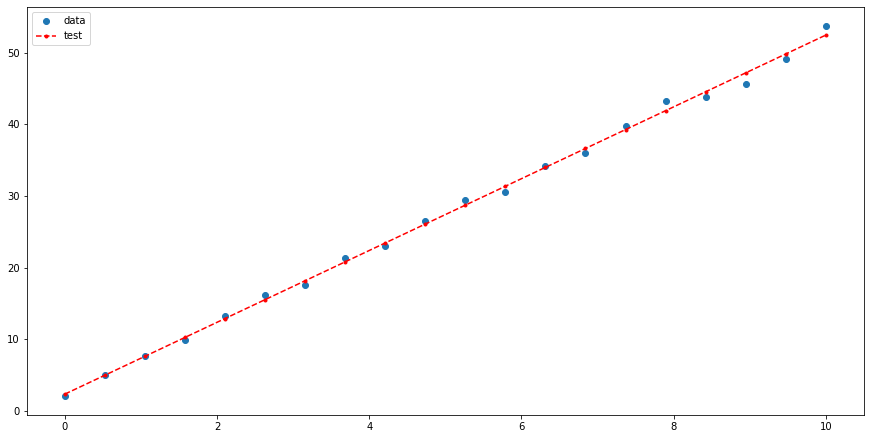

In [18]:
fig,ax = plt.subplots(figsize=(15,7.5))
ax.plot(x,y,'o',label='data') #原始数据
ax.plot(x,y_,'r--.',label='test')#拟合数据
ax.legend(loc='best')
plt.show()

# 高阶回归

In [19]:
# Y=5+2X+3X^2

nsample = 50
x = np.linspace(0,10,nsample)
X = np.column_stack((x,x**2))
X = sm.add_constant(X)

In [20]:
beta = np.array([5,2,3])
e = np.random.normal(size=nsample)
y = np.dot(X,beta) + e
model = sm.OLS(y,X)
results = model.fit()
results.params

array([5.62615757, 1.68401161, 3.02700279])

In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.529e+05
Date:                Mon, 09 May 2022   Prob (F-statistic):           1.77e-95
Time:                        21:16:58   Log-Likelihood:                -67.581
No. Observations:                  50   AIC:                             141.2
Df Residuals:                      47   BIC:                             146.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.6262      0.393     14.306      0.000       4.835       6.417
x1             1.6840      0.182      9.259      0.000       1.318       2.050
x2             3.0270      0.018    172.097      0.000       2.992       3.062
==============================================================================
Omnibus:                       12.064   Durbin-Watson:                   2.156
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               19.339
Skew:                           0.684   Prob(JB):                     6.32e-05
Kurtosis:                       5.722   Cond. No.                         142.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

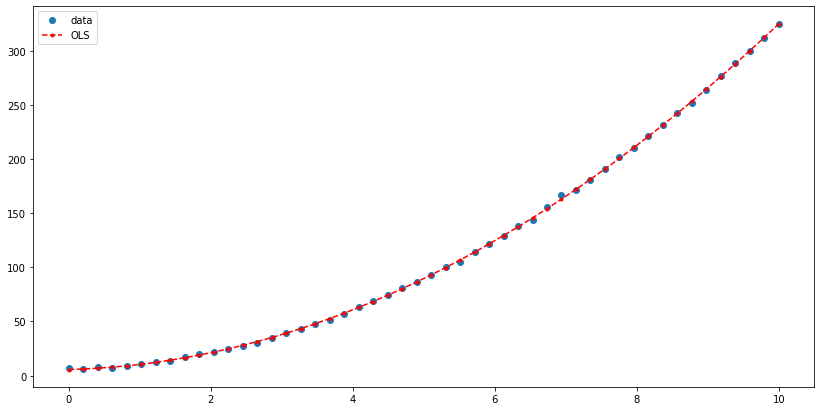

In [23]:
y_fitted = results.fittedvalues
fig,ax = plt.subplots(figsize=(14,7))
ax.plot(x,y,'o',label='data')
ax.plot(x,y_fitted,'r--.',label='OLS')
ax.legend(loc='best')
plt.show()

# 分类变量

假设分类变量有3个取值（a,b,c)，比如考试等级有3个等级。那么a就是（1，0，0），b(0,1,0),c(0,0,1),这个时候就需要3个系数β0，β1，β2，也就是β0*0+β1*1+β2*2

In [24]:
nsample = 50
groups = np.zeros(nsample,int)
groups

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [28]:
import pandas as pd
groups[20:40] = 1
groups[40:] = 2
dummy = sm.categorical(groups,drop=True)
dummy

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [32]:
#Y=5+2X+3Z1+6Z2+9Z3
import statsmodels.api as sm
x = np.linspace(0,20,nsample)
X = np.column_stack((x,dummy))
X = sm.add_constant(X)
beta = [5,2,3,6,9]
e = np.random.normal(size=nsample)
y = np.dot(X,beta) + e
result = sm.OLS(y,X).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3728.
Date:                Mon, 09 May 2022   Prob (F-statistic):           6.68e-55
Time:                        21:28:14   Log-Likelihood:                -64.892
No. Observations:                  50   AIC:                             137.8
Df Residuals:                      46   BIC:                             145.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.7472      0.523     14.804      0.000       6.694       8.801
x1             2.0670      0.060     34.328      0.000       1.946       2.188
x2             0.2212      0.332      0.667      0.508      -0.447       0.889
x3             2.6725      0.277      9.636      0.000       2.114       3.231
x4             4.8535      0.625      7.767      0.000       3.596       6.111
==============================================================================
Omnibus:                        0.564   Durbin-Watson:                   2.263
Prob(Omnibus):                  0.754   Jarque-Bera (JB):                0.216
Skew:                          -0.155   Prob(JB):                        0.898
Kurtosis:                       3.090   Cond. No.                     1.68e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.41e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [33]:
!pip install plotly

ERROR: Could not find a version that satisfies the requirement plotly (from versions: none)
ERROR: No matching distribution found for plotly
